In [1]:
import xarray as xr
import numpy as np

In [2]:
BURDENSO4dn_1970 = xr.open_dataset('/glade/work/jzweifel/data_1970/h3_concat_1970.nc')['BURDENSO4dn']
# Sulfate aerosol burden, day night (kg/m2)

BURDENSO4dn_2006 = xr.open_dataset('/glade/work/jzweifel/data_2006/h3_concat_2006.nc')['BURDENSO4dn']
# Sulfate aerosol burden, day night (kg/m2)

log_diff_2006_1970 = np.log(BURDENSO4dn_2006) - np.log(BURDENSO4dn_1970)
# Unitless ratio in log-space, Log(a) - Log(b) = Log(a/b)

NPO_mask = xr.open_dataarray('/glade/work/jzweifel/Regional_Masks_And_Area/masks/NPO/NPO_binary_lower_bound_20_deg.nc')

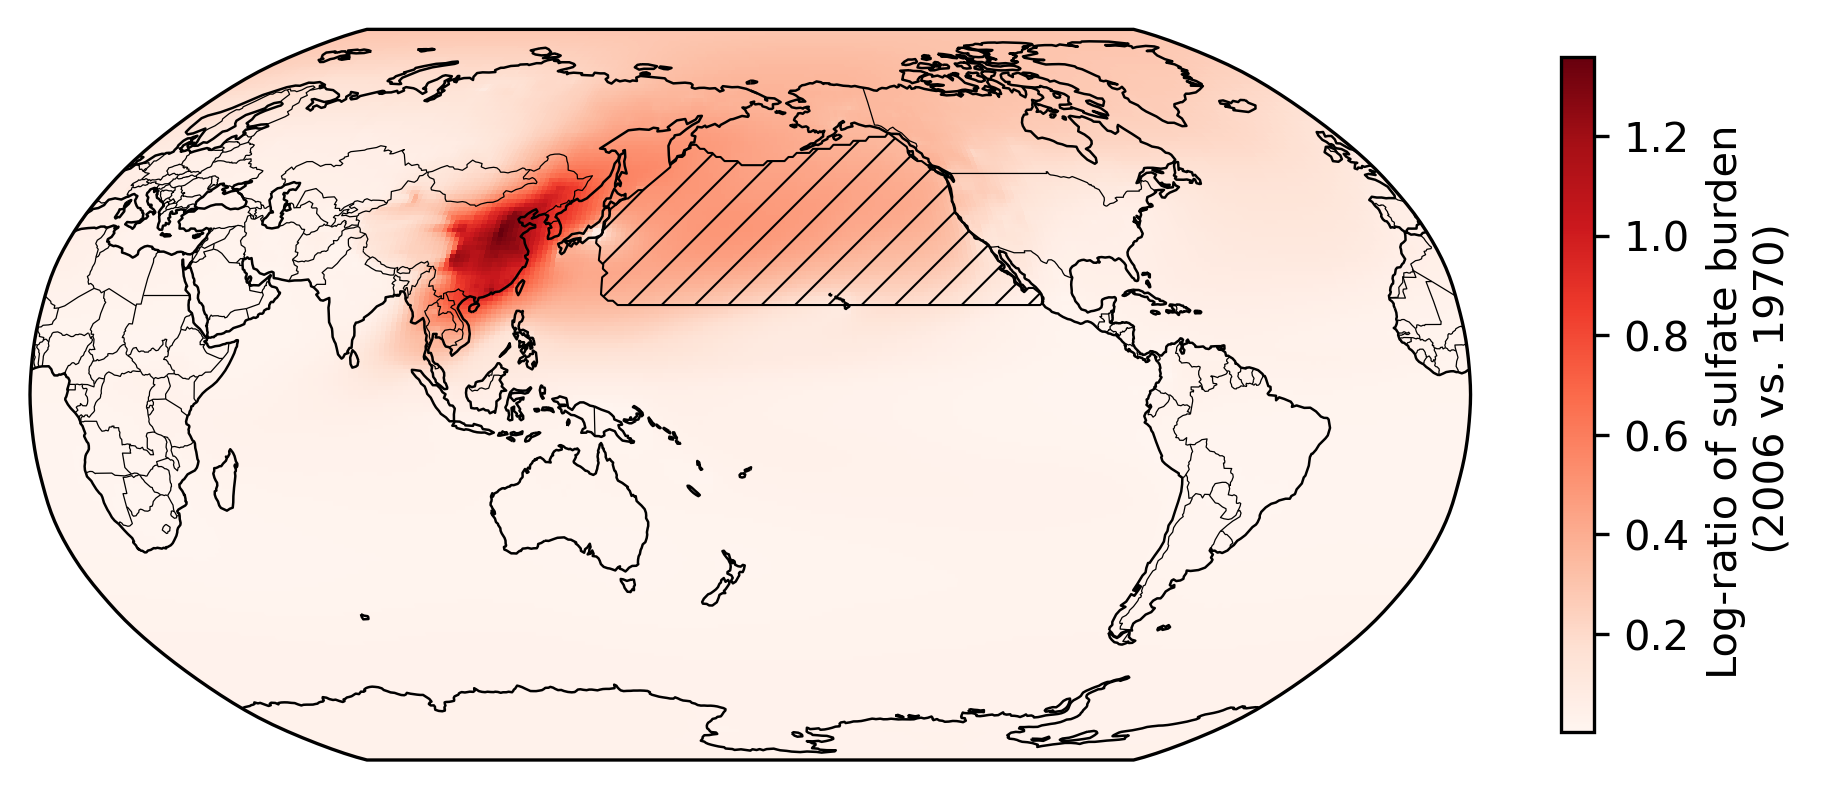

In [42]:
from matplotlib import pyplot as plt
from cartopy import crs as ccrs, feature as cfeature

lon = log_diff_2006_1970.lon
lat = log_diff_2006_1970.lat

fig, ax = plt.subplots(1,1, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)}, dpi=300)

plt.rcParams['hatch.color'] = 'black'  # Set hatch color to black
plt.rcParams['hatch.linewidth'] = 0.5  # Adjust this value as desired


m0 = ax.pcolormesh(lon, lat, log_diff_2006_1970.mean(dim=['time']), transform=ccrs.PlateCarree(), cmap='Reds')
m1 = ax.contour(lon, lat, NPO_mask, transform=ccrs.PlateCarree(), colors='black', levels=[0.5], linewidths=0.5)
m2 = ax.contourf(lon, lat, NPO_mask, transform=ccrs.PlateCarree(), colors='none', hatches=['///'], levels=[0.5, 1.5])
ax.add_feature(cfeature.COASTLINE, linewidth = 0.6)
ax.add_feature(cfeature.BORDERS, linewidth = 0.3)

# gl = ax.gridlines(linestyle='--', alpha=0.5, linewidth=0.5, color='gray')

plt.colorbar(m0, shrink=0.5, label='Log-ratio of sulfate burden \n (2006 vs. 1970)', orientation='vertical')
plt.tight_layout()